In [1]:
import numpy as np
import pandas as pd 

In [2]:
hr_df = pd.read_csv('G:/Chandra Mouli Sir/CLass_6/HR_comma_sep.csv')

In [3]:
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
hr_df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [5]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
hr_df.isnull().any().sum()

0

In [7]:
hr_df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


In [8]:
numerical_features = ['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company']
categorical_features = ['Work_accident','promotion_last_5years','department', 'salary']

In [9]:
a = pd.get_dummies(hr_df.salary, drop_first='true',prefix = 'salary')
b = pd.get_dummies(hr_df.Work_accident, drop_first='true',prefix = 'Work_accident')
c = pd.get_dummies(hr_df.promotion_last_5years, drop_first='true',prefix = 'promotion_last_5years') 
d = pd.get_dummies(hr_df.department, drop_first='true',prefix = 'department') 

In [10]:
hr_df = pd.concat([hr_df,a,b,c,d], axis = 1)

In [11]:
hr_df.drop(['Work_accident','promotion_last_5years','department', 'salary'], axis = 1, inplace = True)

In [12]:
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,left,salary_low,salary_medium,Work_accident_1,promotion_last_5years_1,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,1,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,1,0,1,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,1,0,1,0,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,1,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,1,1,0,0,0,0,0,0,0,0,0,1,0,0


In [13]:
hr_df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'left', 'salary_low',
       'salary_medium', 'Work_accident_1', 'promotion_last_5years_1',
       'department_RandD', 'department_accounting', 'department_hr',
       'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_support',
       'department_technical'],
      dtype='object')

In [14]:
hr_df.shape

(14999, 19)

In [15]:
feature_columns = hr_df.columns.difference(['left'])

In [16]:
feature_columns

Index(['Work_accident_1', 'average_montly_hours', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical', 'last_evaluation',
       'number_project', 'promotion_last_5years_1', 'salary_low',
       'salary_medium', 'satisfaction_level', 'time_spend_company'],
      dtype='object')

In [17]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(hr_df[feature_columns], hr_df['left'],
                                                    test_size = 0.3, random_state = 2)

In [18]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(train_X, train_y)

C:\Users\NitinBabu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [19]:
logreg.predict(train_X)

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [20]:
logreg.predict_proba(train_X)

array([[0.42594151, 0.57405849],
       [0.90384376, 0.09615624],
       [0.48136779, 0.51863221],
       ...,
       [0.96282477, 0.03717523],
       [0.8690185 , 0.1309815 ],
       [0.72067102, 0.27932898]])

In [21]:
logreg.coef_

array([[-1.4000176 ,  0.00445217, -0.42155089,  0.205581  ,  0.31732879,
        -0.3460868 ,  0.12636761,  0.00980215,  0.10685534,  0.20963237,
         0.16424955,  0.61842059, -0.29694161, -1.19076507,  1.77733837,
         1.26973789, -4.06310184,  0.25636522]])

In [22]:
logreg.intercept_

array([-1.46050728])

In [23]:
list(zip(feature_columns,logreg.coef_[0]))

[('Work_accident_1', -1.400017602874211),
 ('average_montly_hours', 0.004452171216569888),
 ('department_RandD', -0.4215508855774559),
 ('department_accounting', 0.20558099944611646),
 ('department_hr', 0.3173287926519314),
 ('department_management', -0.34608680231065586),
 ('department_marketing', 0.126367610494858),
 ('department_product_mng', 0.009802150074297732),
 ('department_sales', 0.10685533901041487),
 ('department_support', 0.20963237036496005),
 ('department_technical', 0.16424954603804634),
 ('last_evaluation', 0.6184205908857657),
 ('number_project', -0.2969416128025232),
 ('promotion_last_5years_1', -1.1907650660058025),
 ('salary_low', 1.7773383671423757),
 ('salary_medium', 1.2697378919951992),
 ('satisfaction_level', -4.063101838924637),
 ('time_spend_company', 0.2563652245812475)]

In [24]:
hr_test_pred = pd.DataFrame({'Actual':test_y,
                            'Predicted':logreg.predict(test_X)})
                           

In [25]:
hr_test_pred = hr_test_pred.reset_index()

In [26]:
hr_test_pred.head()

,index,Actual,Predicted
0,7231,0,0
1,12081,1,1
2,5364,0,0
3,14589,1,0
4,2353,0,0


In [27]:
from sklearn import metrics
cm = metrics.confusion_matrix(hr_test_pred.Actual,hr_test_pred.Predicted,[1,0])
cm

array([[ 390,  716],
       [ 253, 3141]], dtype=int64)

In [28]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

Text(0.5, 15.0, 'Predicted label')

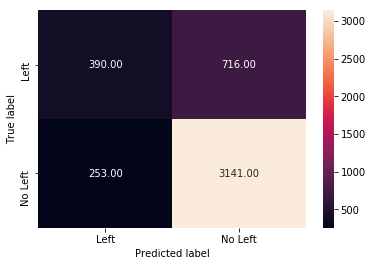

In [29]:
sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [30]:
score = metrics.accuracy_score(hr_test_pred.Actual,hr_test_pred.Predicted)
round(score,3)

0.785

In [31]:
pred_proba_df = pd.DataFrame(logreg.predict_proba(test_X))
pred_proba_df.head()

,0,1
0,0.885617,0.114383
1,0.478109,0.521891
2,0.933675,0.066325
3,0.625709,0.374291
4,0.898221,0.101779


In [32]:
hr_test_pred.head()

,index,Actual,Predicted
0,7231,0,0
1,12081,1,1
2,5364,0,0
3,14589,1,0
4,2353,0,0


In [33]:
hr_test_pred = pd.concat( [hr_test_pred, pred_proba_df], axis = 1 )
hr_test_pred.columns = [ 'index','actual', 'predicted', 'Left_0', 'Left_1']
hr_test_pred.head()


,index,actual,predicted,Left_0,Left_1
0,7231,0,0,0.885617,0.114383
1,12081,1,1,0.478109,0.521891
2,5364,0,0,0.933675,0.066325
3,14589,1,0,0.625709,0.374291
4,2353,0,0,0.898221,0.101779


In [34]:
auc_score = metrics.roc_auc_score(hr_test_pred.actual, hr_test_pred.Left_1)
round(auc_score,2)

0.82

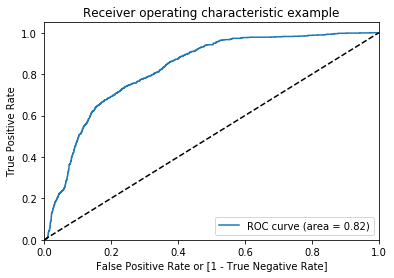

In [35]:
fpr, tpr, thresholds = metrics.roc_curve(hr_test_pred.actual, hr_test_pred.Left_1,drop_intermediate = False )
                                     
                                     

plt.figure(figsize=(6, 4))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [36]:
print(thresholds[0:10])
print(fpr[0:10])
print(tpr[0:10])

[1.90028267 0.90028267 0.88232448 0.8743329  0.87289066 0.87266622
 0.86538429 0.85618711 0.84304425 0.84018257]
[0.         0.00029464 0.00058928 0.00088391 0.00117855 0.00147319
 0.00176783 0.00206246 0.00265174 0.00324101]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [37]:
thresholds[(np.abs(tpr - 0.7)).argmin()]

0.2872056286847089

In [38]:
cutoff_prob = thresholds[(np.abs(tpr - 0.7)).argmin()]
cutoff_prob

0.2872056286847089

In [39]:
hr_test_pred['new_labels'] = hr_test_pred['Left_1'].map(lambda x: 1 if x>0.29 else 0)
hr_test_pred.head(10)

,index,actual,predicted,Left_0,Left_1,new_labels
0,7231,0,0,0.885617,0.114383,0
1,12081,1,1,0.478109,0.521891,1
2,5364,0,0,0.933675,0.066325,0
3,14589,1,0,0.625709,0.374291,1
4,2353,0,0,0.898221,0.101779,0
5,9759,0,0,0.988873,0.011127,0
6,6400,0,0,0.778495,0.221505,0
7,11769,0,0,0.850025,0.149975,0
8,14864,1,0,0.611013,0.388987,1
9,4256,0,0,0.881033,0.118967,0


Text(0.5, 15.0, 'Predicted label')

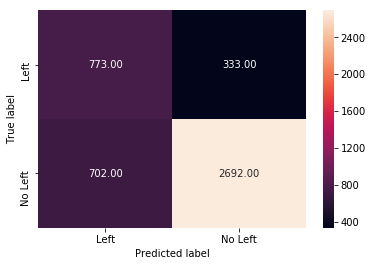

In [40]:
cm = metrics.confusion_matrix( hr_test_pred.actual,
                          hr_test_pred.new_labels, [1,0] )
sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [41]:
score_1 = metrics.accuracy_score(hr_test_pred.actual, hr_test_pred.new_labels)
score_1

0.77

### Decision Tree

In [42]:
from sklearn import tree as dt

In [43]:
dir(dt)

['DecisionTreeClassifier',
 'DecisionTreeRegressor',
 'ExtraTreeClassifier',
 'ExtraTreeRegressor',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_criterion',
 '_splitter',
 '_tree',
 '_utils',
 'export',
 'export_graphviz',
 'tree']

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [45]:
clf_tree = DecisionTreeClassifier(max_depth=4)
clf_tree.fit(train_X,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [74]:
print(dict(zip(hr_df.columns, clf_tree.feature_importances_)))

{'satisfaction_level': 0.0, 'last_evaluation': 0.057823659258651745, 'number_project': 0.0, 'average_montly_hours': 0.0, 'time_spend_company': 0.0, 'left': 0.0, 'salary_low': 0.0, 'salary_medium': 0.0, 'Work_accident_1': 0.0, 'promotion_last_5years_1': 0.0, 'department_RandD': 0.0, 'department_accounting': 0.14950061928387606, 'department_hr': 0.10517855565946475, 'department_management': 0.0, 'department_marketing': 0.0, 'department_product_mng': 0.0, 'department_sales': 0.5521941797669737, 'department_support': 0.13530298603103366}


In [46]:
clf_tree.predict_proba(train_X)

array([[0.        , 1.        ],
       [0.98694811, 0.01305189],
       [0.03035879, 0.96964121],
       ...,
       [0.98694811, 0.01305189],
       [0.98694811, 0.01305189],
       [0.98694811, 0.01305189]])

In [47]:
pd.DataFrame(clf_tree.predict_proba(train_X)).head()

,0,1
0,0.000000,1.000000
1,0.986948,0.013052
2,0.030359,0.969641
3,0.147353,0.852647
4,0.147353,0.852647


In [48]:
pd.DataFrame(clf_tree.predict_proba(train_X))[1].head()

0    1.000000
1    0.013052
2    0.969641
3    0.852647
4    0.852647
Name: 1, dtype: float64

In [49]:
tree_train_pred_prob = pd.DataFrame({'actual': train_y,
                                      'predicted':pd.DataFrame(clf_tree.predict_proba(train_X),
                                      index = train_y.index) [1] })
tree_train_pred_prob.head()

,actual,predicted
1354,1,1.000000
4026,0,0.013052
14452,1,0.969641
12170,1,0.852647
12342,1,0.852647


In [50]:
metrics.roc_auc_score(tree_train_pred_prob.actual,tree_train_pred_prob.predicted)

0.9719722619031387

In [51]:
somersD = 2* metrics.roc_auc_score(tree_train_pred_prob.actual,tree_train_pred_prob.predicted) - 1
somersD

0.9439445238062774

In [52]:
tree_test_pred_prob = pd.DataFrame({'actual': test_y,
                                      'predicted':pd.DataFrame(clf_tree.predict_proba(test_X),
                                      index = test_y.index) [1] })
tree_test_pred_prob.head()

,actual,predicted
7231,0,0.013052
12081,1,0.969641
5364,0,0.013052
14589,1,0.064272
2353,0,0.013052


In [53]:
metrics.roc_auc_score(tree_test_pred_prob.actual,tree_test_pred_prob.predicted)

0.9721488884223942

In [54]:
somersD = 2* metrics.roc_auc_score(tree_test_pred_prob.actual,tree_test_pred_prob.predicted) - 1
somersD

0.9442977768447884

In [55]:
train_y.value_counts()

0    8034
1    2465
Name: left, dtype: int64

In [56]:
test_y.value_counts()

0    3394
1    1106
Name: left, dtype: int64

In [57]:
tree_train_pred = pd.DataFrame({'actual': train_y,
                             'predicted': clf_tree.predict(train_X)})
tree_train_pred.head()

,actual,predicted
1354,1,1
4026,0,0
14452,1,1
12170,1,1
12342,1,1


In [58]:
tree_test_pred = pd.DataFrame({'actual': test_y,
                             'predicted': clf_tree.predict(test_X)})
tree_test_pred.head()

,actual,predicted
7231,0,0
12081,1,1
5364,0,0
14589,1,0
2353,0,0


Text(0.5, 15.0, 'Predicted label')

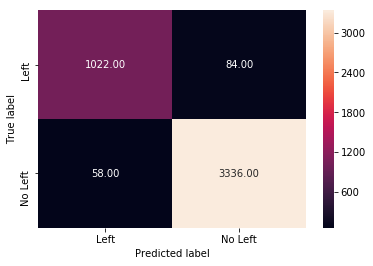

In [59]:
tree_cm = metrics.confusion_matrix(  tree_test_pred.actual,
                                   tree_test_pred.predicted, [1,0] )
sn.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

In [60]:
print(metrics.classification_report(tree_train_pred.actual, tree_train_pred.predicted))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      8034
           1       0.94      0.93      0.93      2465

   micro avg       0.97      0.97      0.97     10499
   macro avg       0.96      0.95      0.96     10499
weighted avg       0.97      0.97      0.97     10499



In [61]:
print(metrics.classification_report(tree_test_pred.actual, tree_test_pred.predicted))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3394
           1       0.95      0.92      0.94      1106

   micro avg       0.97      0.97      0.97      4500
   macro avg       0.96      0.95      0.96      4500
weighted avg       0.97      0.97      0.97      4500



In [62]:
metrics.roc_auc_score(train_y,tree_train_pred_prob.predicted)

0.9719722619031387

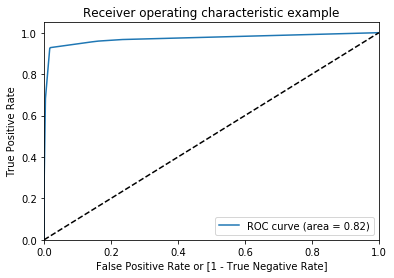

In [63]:
fpr, tpr, thresholds = metrics.roc_curve( train_y,
                                     tree_train_pred_prob.predicted,
                                     drop_intermediate = False )

plt.figure(figsize=(6, 4))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [64]:
metrics.roc_auc_score(test_y, tree_test_pred_prob.predicted)

0.9721488884223942

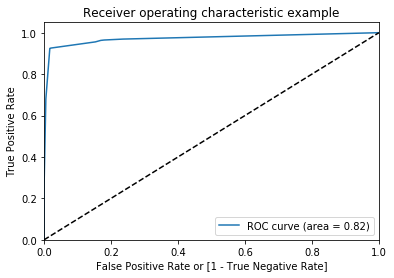

In [65]:
fpr, tpr, thresholds = metrics.roc_curve( test_y,
                                     tree_test_pred_prob.predicted,
                                     drop_intermediate = False )

plt.figure(figsize=(6, 4))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [66]:
print(fpr)
print(tpr)
print(thresholds)

[0.         0.         0.00530348 0.01708898 0.01708898 0.02032999
 0.15321155 0.16941662 0.1794343  0.23600471 0.99646435 1.        ]
[0.         0.25587703 0.67992767 0.92314647 0.92405063 0.92585895
 0.9556962  0.96292948 0.96473779 0.96925859 1.         1.        ]
[2.         1.         0.96964121 0.85264664 0.66666667 0.26923077
 0.06427221 0.05625    0.03333333 0.03106796 0.01305189 0.        ]


In [67]:
param_grid = {'max_depth': np.arange(3,15),
             'max_features': np.arange(2,12)}

In [68]:
GridSearchCV?

In [68]:
tree = GridSearchCV (DecisionTreeClassifier(), param_grid, cv = 5, scoring = 'roc_auc')
tree.fit(train_X, train_y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]), 'max_features': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [69]:
tree.best_score_

0.9792084669539663

In [70]:
tree.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=9, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [71]:
tree.best_params_

{'max_depth': 7, 'max_features': 9}

In [73]:
metrics.roc_auc_score(train_y, pd.DataFrame(tree.predict_proba(train_X))[1])

0.9893447271004924

In [74]:
metrics.roc_auc_score(test_y, pd.DataFrame(tree.predict_proba(test_X))[1])

0.9773541970139838

In [75]:
train_pred = tree.predict(train_X)

In [76]:
print(metrics.classification_report(train_y, train_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      8034
           1       0.94      0.95      0.94      2465

   micro avg       0.97      0.97      0.97     10499
   macro avg       0.96      0.96      0.96     10499
weighted avg       0.97      0.97      0.97     10499



In [77]:
test_pred = tree.predict(test_X)

In [78]:
print(metrics.classification_report(test_y, test_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      3394
           1       0.92      0.94      0.93      1106

   micro avg       0.97      0.97      0.97      4500
   macro avg       0.95      0.96      0.95      4500
weighted avg       0.97      0.97      0.97      4500



### Final Decision Tree

In [79]:
clf_tree = DecisionTreeClassifier (max_depth = 8, max_features = 8)
clf_tree.fit (train_X, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [80]:
clf_tree.feature_importances_

array([6.42751061e-03, 1.45009662e-01, 4.56232028e-04, 1.64243656e-04,
       8.48044635e-05, 0.00000000e+00, 4.56109389e-04, 0.00000000e+00,
       4.38310498e-04, 8.51003943e-04, 4.07206451e-04, 5.63788171e-02,
       1.63392018e-01, 1.61307850e-04, 1.32227611e-03, 4.87862913e-03,
       3.41050215e-01, 2.78521654e-01])

In [81]:
train_X.columns

Index(['Work_accident_1', 'average_montly_hours', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical', 'last_evaluation',
       'number_project', 'promotion_last_5years_1', 'salary_low',
       'salary_medium', 'satisfaction_level', 'time_spend_company'],
      dtype='object')

In [82]:
var_imp = pd.concat([pd.Series(train_X.columns), pd.Series(clf_tree.feature_importances_)], axis = 1)
var_imp.columns = ['features', 'importance']
var_imp

,features,importance
0,Work_accident_1,0.006428
1,average_montly_hours,0.145010
2,department_RandD,0.000456
3,department_accounting,0.000164
4,department_hr,0.000085
5,department_management,0.000000
6,department_marketing,0.000456
7,department_product_mng,0.000000
8,department_sales,0.000438
9,department_support,0.000851


In [83]:
var_imp.sort_values('importance', ascending=False)

,features,importance
16,satisfaction_level,0.341050
17,time_spend_company,0.278522
12,number_project,0.163392
1,average_montly_hours,0.145010
11,last_evaluation,0.056379
0,Work_accident_1,0.006428
15,salary_medium,0.004879
14,salary_low,0.001322
9,department_support,0.000851
2,department_RandD,0.000456


In [84]:
tree_test_pred = pd.DataFrame({'actual': test_y,
                              'predicted': clf_tree.predict(test_X)
                              })
tree_test_pred.head()

,actual,predicted
7231,0,0
12081,1,1
5364,0,0
14589,1,0
2353,0,0


In [85]:
metrics.roc_auc_score(tree_test_pred.actual, tree_test_pred.predicted)

0.9449115607694037

In [86]:
metrics.accuracy_score(tree_test_pred.actual, tree_test_pred.predicted)

0.9633333333333334

Text(0.5, 15.0, 'Predicted label')

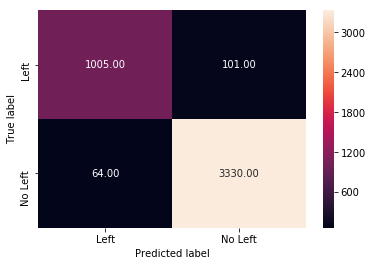

In [87]:
tree_cm = metrics.confusion_matrix(tree_test_pred.actual, tree_test_pred.predicted, [1,0])
sn.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')


## Ensemble
### Bagging Classifier

In [88]:
from sklearn.ensemble import BaggingClassifier 

In [89]:
bagclm = BaggingClassifier(n_estimators=100, verbose=True, oob_score=True, n_jobs=-1)
bagclm.fit (train_X, train_y)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    2.0s remaining:    6.2s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    2.2s finished


BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=100, n_jobs=-1, oob_score=True, random_state=None,
         verbose=True, warm_start=False)

In [90]:
bagclm.predict(train_X)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.1s finished


array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [91]:
bagclm.oob_score_

0.9886655871987808

In [92]:
y_pred = pd.DataFrame({'actual': test_y,
                      'predicted': bagclm.predict(test_X)})
y_pred.head()

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.0s finished


,actual,predicted
7231,0,0
12081,1,1
5364,0,0
14589,1,1
2353,0,0


In [93]:
metrics.accuracy_score(y_pred.actual, y_pred.predicted)

0.9888888888888889

In [94]:
metrics.roc_auc_score(y_pred.actual, y_pred.predicted)

0.9810531509173193

Text(0.5, 15.0, 'Predicted label')

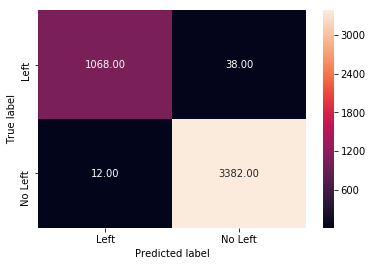

In [95]:
tree_bg = metrics.confusion_matrix( y_pred.actual,
                                   y_pred.predicted,
                                 
                                 [1,0] )
sn.heatmap(tree_bg, annot=True,
         fmt='.2f',
         xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

In [96]:
para_grid = {'n_estimators': [40,50,60,70,80,90,100,110]}

In [97]:
gscv_bagging = GridSearchCV(BaggingClassifier(), param_grid = para_grid, cv = 5, verbose=True, n_jobs=-1 )


In [98]:
gscv_results = gscv_bagging.fit(train_X, train_y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   16.1s finished


In [99]:
gscv_results.best_estimator_

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=60, n_jobs=None, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [100]:
gscv_results.best_params_

{'n_estimators': 60}

### Random Forest

In [101]:
from sklearn.ensemble import RandomForestClassifier

In [102]:
rfs = RandomForestClassifier(n_estimators=100, oob_score=True, max_features=6, n_jobs=-1)
rfs.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=6, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [103]:
rfso = pd.DataFrame({'actual': test_y,
                    'predicted': rfs.predict(test_X)})
rfso.head()

,actual,predicted
7231,0,0
12081,1,1
5364,0,0
14589,1,1
2353,0,0


In [104]:
metrics.accuracy_score(rfso.actual, rfso.predicted)

0.9902222222222222

In [105]:
metrics.roc_auc_score(rfso.actual, rfso.predicted)

0.9807180206320909

In [106]:
rf_cm = metrics.confusion_matrix (rfso.predicted,rfso.actual, [1,0])
rf_cm


array([[1064,    2],
       [  42, 3392]], dtype=int64)

Text(0.5, 15.0, 'Predicted label')

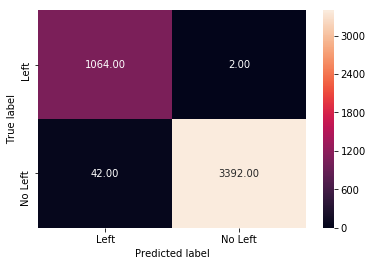

In [107]:
rf_cm = metrics.confusion_matrix (rfso.predicted,rfso.actual, [1,0])
sn.heatmap(rf_cm, annot=True,
         fmt='.2f',
         xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

In [108]:
rfs.feature_importances_

array([0.00602832, 0.13566371, 0.00099053, 0.00164171, 0.00134663,
       0.00135733, 0.00136096, 0.0008483 , 0.00313189, 0.00289691,
       0.00377597, 0.11756746, 0.18930413, 0.00096283, 0.00575594,
       0.00314321, 0.34469215, 0.17953201])

In [109]:
train_X.columns

Index(['Work_accident_1', 'average_montly_hours', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical', 'last_evaluation',
       'number_project', 'promotion_last_5years_1', 'salary_low',
       'salary_medium', 'satisfaction_level', 'time_spend_company'],
      dtype='object')

In [110]:
feature_imp = pd.concat([pd.Series(train_X.columns), pd.Series(rfs.feature_importances_)],
                        axis =1)
feature_imp. columns = ['feature','level']

In [111]:
feature_imp.sort_values('level', ascending=False)

,feature,level
16,satisfaction_level,0.344692
12,number_project,0.189304
17,time_spend_company,0.179532
1,average_montly_hours,0.135664
11,last_evaluation,0.117567
0,Work_accident_1,0.006028
14,salary_low,0.005756
10,department_technical,0.003776
15,salary_medium,0.003143
8,department_sales,0.003132


In [112]:
par_grid = {'n_estimators': [40,50,60,70,80,90,100,110],
           'max_features': np.arange(4,12)}

In [113]:
rfgrid = GridSearchCV (estimator = RandomForestClassifier(), param_grid = par_grid,verbose=True, cv = 5, n_jobs=-1)
rfgrid_results = rfgrid.fit(train_X, train_y)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   26.1s
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:   55.8s finished


In [114]:
rfgrid_results.best_score_

0.9888560815315744

In [115]:
rfgrid_results.best_params_

{'max_features': 8, 'n_estimators': 50}

### XGBoost

In [116]:
import xgboost as xgb

In [118]:
xgb.XGBClassifier()

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [119]:
results = []
eval_set = [(train_X, train_y), (test_X, test_y)]

In [123]:
# Enumerate through different max_depth values and store results
for max_depth in [2,3,4,5,10,12,15]:
    clf = xgb.XGBClassifier(max_depth=max_depth)
    clf.fit(train_X, train_y, eval_set=eval_set, verbose=False)
    results.append(
        {
            'max_depth': max_depth,
            'train_error': metrics.mean_squared_error(train_y, clf.predict(train_X)),
            'test_error': metrics.mean_squared_error(test_y, clf.predict(test_X))
        })
    
# Display Results
max_depth_lr = pd.DataFrame(results).set_index('max_depth').sort_index()
max_depth_lr

,test_error,train_error
max_depth,,
2,0.031556,0.030003
3,0.024889,0.023717
4,0.022667,0.020954
5,0.020889,0.017906
10,0.013111,0.005429
12,0.010444,0.002953
15,0.010222,0.001333


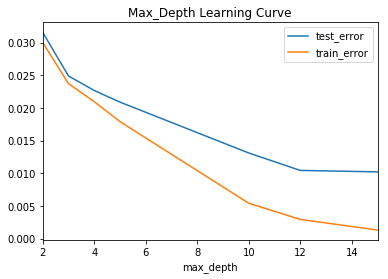

In [124]:
max_depth_lr.plot(title="Max_Depth Learning Curve")

In [126]:
results = []

for learning_rate in [0.05,0.1,0.2,0.4,0.6,0.8,1]:
    clf = xgb.XGBClassifier(max_depth=2,learning_rate=learning_rate, n_estimators=200)
    clf.fit(train_X, train_y, eval_set=eval_set, verbose=False)
    results.append(
        {
            'learning_rate': learning_rate,
            'train_error': metrics.mean_squared_error(train_y, clf.predict(train_X)),
            'test_error': metrics.mean_squared_error(test_y, clf.predict(test_X))
        })
    
learning_rate_lr = pd.DataFrame(results).set_index('learning_rate').sort_index()
learning_rate_lr

,test_error,train_error
learning_rate,,
0.05,0.031556,0.030384
0.10,0.026222,0.024574
0.20,0.025556,0.023145
0.40,0.023111,0.017906
0.60,0.022889,0.016383
0.80,0.023333,0.013144
1.00,0.022000,0.012001


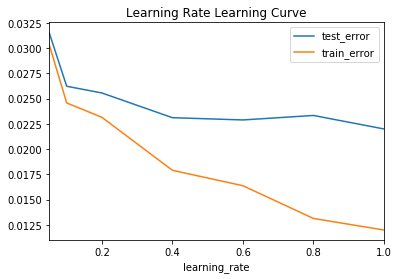

In [127]:
learning_rate_lr.plot(title="Learning Rate Learning Curve")

In [128]:
results = []

for n_estimators in [50,60,100,150,200,500,750,1000, 1500]:
    clf = xgb.XGBClassifier(max_depth=2,learning_rate=0.10, n_estimators=n_estimators)
    clf.fit(train_X, train_y, eval_set=eval_set, verbose=False)
    results.append(
        {
            'n_estimators': n_estimators,
            'train_error': metrics.mean_squared_error(train_y, clf.predict(train_X)),
            'test_error': metrics.mean_squared_error(test_y, clf.predict(test_X))
        })
    
n_estimators_lr = pd.DataFrame(results).set_index('n_estimators').sort_index()
n_estimators_lr

,test_error,train_error
n_estimators,,
50,0.056667,0.052005
60,0.035778,0.037623
100,0.031556,0.030003
150,0.028000,0.026193
200,0.026222,0.024574
500,0.025111,0.022859
750,0.022889,0.019811
1000,0.022889,0.018097
1500,0.022222,0.015525


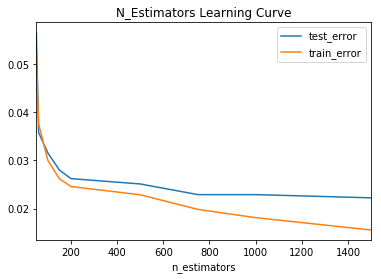

In [129]:
n_estimators_lr.plot(title="N_Estimators Learning Curve")

In [130]:
param_grid = {"max_depth": [5,10,15,20],
              "max_features" : [1.0,0.3,0.1],
              "min_samples_leaf" : [3,5,9],
              "n_estimators": [100,150,200,300],
              "learning_rate": [0.05,0.1,0.02,0.2,0.4,0.6]}

In [132]:
xggrid = GridSearchCV (estimator = xgb.XGBClassifier(), param_grid = param_grid,verbose=True, cv = 5, n_jobs=-1)
xggrid_results = xggrid.fit(train_X, train_y)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 15.7min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 24.4min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 34.9min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 48.0min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 61.5min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 75.2min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed: 79.9min finished


In [133]:
xggrid_results.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.05,
       max_delta_step=0, max_depth=15, max_features=1.0,
       min_child_weight=1, min_samples_leaf=3, missing=None,
       n_estimators=300, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [134]:
best_model = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.05,
       max_delta_step=0, max_depth=15, max_features=1.0,
       min_child_weight=1, min_samples_leaf=3, missing=None,
       n_estimators=300, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [138]:
best_model.fit(train_X, train_y, early_stopping_rounds=10, eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.018764	validation_1-error:0.022222
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0.018764	validation_1-error:0.022222
[2]	validation_0-error:0.018764	validation_1-error:0.022
[3]	validation_0-error:0.018764	validation_1-error:0.022222
[4]	validation_0-error:0.018478	validation_1-error:0.022444
[5]	validation_0-error:0.018192	validation_1-error:0.022667
[6]	validation_0-error:0.018287	validation_1-error:0.022667
[7]	validation_0-error:0.018097	validation_1-error:0.022444
[8]	validation_0-error:0.017716	validation_1-error:0.022222
[9]	validation_0-error:0.017716	validation_1-error:0.022222
[10]	validation_0-error:0.017716	validation_1-error:0.022222
[11]	validation_0-error:0.017335	validation_1-error:0.022
[12]	validation_0-error:0.017049	validation_1-error:0.022
Stopping. Best iteration:
[2]	validation_0-error:0.018764	validat

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.05,
       max_delta_step=0, max_depth=15, max_features=1.0,
       min_child_weight=1, min_samples_leaf=3, missing=None,
       n_estimators=300, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [139]:
best_mod = pd.DataFrame({'actual': test_y,
                        'predicted': best_model.predict(test_X)})
best_mod.head()

,actual,predicted
7231,0,0
12081,1,1
5364,0,0
14589,1,0
2353,0,0


In [140]:
metrics.accuracy_score(best_mod.actual, best_mod.predicted)

0.978

In [141]:
metrics.roc_auc_score(best_mod.actual, best_mod.predicted)

0.960425056023767

In [143]:
xg_cm = metrics.confusion_matrix(best_mod.actual, best_mod.predicted)
xg_cm

array([[3377,   17],
       [  82, 1024]], dtype=int64)

Text(0.5, 15.0, 'Predicted label')

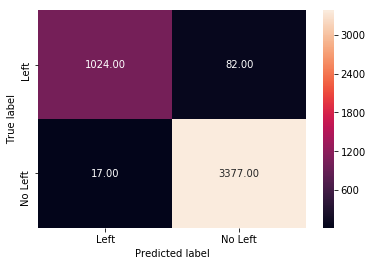

In [144]:
xg_cm = metrics.confusion_matrix (best_mod.actual, best_mod.predicted, [1,0])
sn.heatmap(xg_cm, annot=True,
         fmt='.2f',
         xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')